In [9]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt

In [10]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"Accuracy: {accuracy:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

In [11]:
# Load dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  #Labels (0 = malignant, 1 = benign)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# 1. Decision Tree
print("Decision Tree:")
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
evaluate_model(dt_model, X_test, y_test)

Decision Tree:
Accuracy: 0.95
ROC AUC: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.96      0.96      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [13]:
# 2. Random Forest
print("Random Forest:")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
evaluate_model(rf_model, X_test, y_test)

Random Forest:
Accuracy: 0.96
ROC AUC: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [14]:
# 3. XGBoost
print("XGBoost:")
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
evaluate_model(xgb_model, X_test, y_test)

XGBoost:
Accuracy: 0.97
ROC AUC: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



C:\Users\mehdi\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [11:18:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [15]:
# 4. K-Nearest Neighbors (KNN)
print("K-Nearest Neighbors (KNN):")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
evaluate_model(knn_model, X_test, y_test)

K-Nearest Neighbors (KNN):
Accuracy: 0.96
ROC AUC: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        63
           1       0.95      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [16]:
#1. Import Libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [17]:
#2. Load Dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
#3. Define the Model and Parameter Grid
# Define the model
model = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 5, 10],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split a node
}


In [19]:
#4. Perform Grid Search
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',  # Metric to evaluate
    cv=5,               # Number of cross-validation folds
    verbose=1,          # Print progress
    n_jobs=-1           # Use all available CPU cores
)

# Fit the model
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [20]:
#5. Evaluate the Best Model
# Get the best model
best_model = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_model.predict(X_test)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



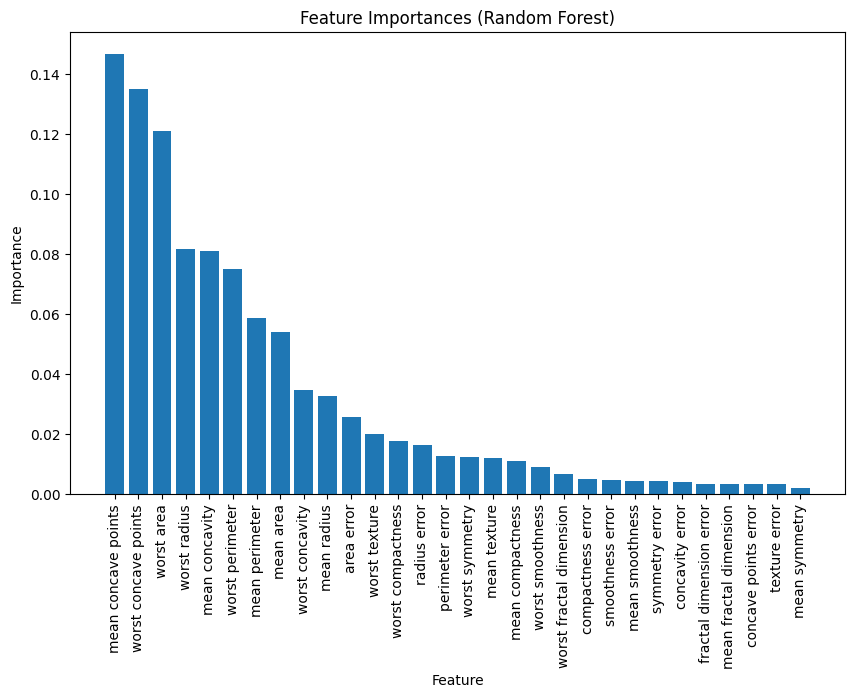

In [24]:
# Plot feature importance for Random Forest
importances = rf_model.feature_importances_
feature_names = data.feature_names
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

1 - Decision Tree : 

In [ ]:

# GridSearchCV for Decision Tree
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_model = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

start_time = time.time()
grid_search_dt.fit(X_train, y_train)
runtime_dt = time.time() - start_time

best_dt = grid_search_dt.best_estimator_
y_proba_dt = evaluate_model(best_dt, X_test, y_test)

print(f"Best Parameters for DT: {grid_search_dt.best_params_}")
print(f"Training Time: {runtime_dt:.2f} seconds\n")

# Compare Feature Importance
dt_importances = best_dt.feature_importances_
dt_indices = np.argsort(dt_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances (Decision Tree)")
plt.bar(range(X.shape[1]), dt_importances[dt_indices], align="center")
plt.xticks(range(X.shape[1]), [data.feature_names[i] for i in dt_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# Plot ROC Curve for Decision Tree
plt.figure(figsize=(8, 6))
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)

plt.plot(fpr_dt, tpr_dt, label="Decision Tree (AUC = {:.2f})".format(roc_auc_score(y_test, y_proba_dt)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()

# Select the 10 most important features
top_n = 10
top_features_dt = [data.feature_names[i] for i in dt_indices[:top_n]]

print("Top 10 Features (Decision Tree):", top_features_dt)

# Create a new dataset with the top 10 features
X_train_dt_top = pd.DataFrame(X_train, columns=data.feature_names)[top_features_dt]
X_test_dt_top = pd.DataFrame(X_test, columns=data.feature_names)[top_features_dt]

# Retrain Decision Tree with the top 10 features
best_dt.fit(X_train_dt_top, y_train)
y_proba_dt_reduced = evaluate_model(best_dt, X_test_dt_top, y_test)

# Compare Performance
plt.figure(figsize=(8, 6))
fpr_dt_reduced, tpr_dt_reduced, _ = roc_curve(y_test, y_proba_dt_reduced)

plt.plot(fpr_dt, tpr_dt, label="DT (All Features) AUC = {:.2f}".format(roc_auc_score(y_test, y_proba_dt)))
plt.plot(fpr_dt_reduced, tpr_dt_reduced, label="DT (Top 10 Features) AUC = {:.2f}".format(roc_auc_score(y_test, y_proba_dt_reduced)))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Comparison)")
plt.legend()
plt.show()

2- Random Forest and xgboost : 

In [ ]:


# GridSearchCV for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
rf_model = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
start_time = time.time()
grid_search_rf.fit(X_train, y_train)
runtime_rf = time.time() - start_time
best_rf = grid_search_rf.best_estimator_
y_proba_rf = evaluate_model(best_rf, X_test, y_test)
print(f"Best Parameters for RF: {grid_search_rf.best_params_}")
print(f"Training Time: {runtime_rf:.2f} seconds\n")
 


# GridSearchCV for XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
start_time = time.time()
grid_search_xgb.fit(X_train, y_train)
runtime_xgb = time.time() - start_time
best_xgb = grid_search_xgb.best_estimator_
y_proba_xgb = evaluate_model(best_xgb, X_test, y_test)
print(f"Best Parameters for XGB: {grid_search_xgb.best_params_}")
print(f"Training Time: {runtime_xgb:.2f} seconds\n")

# Compare Feature Importance
rf_importances = best_rf.feature_importances_
xgb_importances = best_xgb.feature_importances_
rf_indices = np.argsort(rf_importances)[::-1]
xgb_indices = np.argsort(xgb_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X.shape[1]), rf_importances[rf_indices], align="center")
plt.xticks(range(X.shape[1]), [data.feature_names[i] for i in rf_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")

plt.subplot(1, 2, 2)
plt.title("Feature Importances (XGBoost)")
plt.bar(range(X.shape[1]), xgb_importances[xgb_indices], align="center", color='orange')
plt.xticks(range(X.shape[1]), [data.feature_names[i] for i in xgb_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")

plt.tight_layout()
plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = {:.2f})".format(roc_auc_score(y_test, y_proba_rf)))
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost (AUC = {:.2f})".format(roc_auc_score(y_test, y_proba_xgb)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


# Sélectionner les 10 caractéristiques les plus importantes pour chaque modèle
top_n = 10  

# Obtenir les indices des 10 caractéristiques les plus importantes
top_features_rf = [data.feature_names[i] for i in rf_indices[:top_n]]
top_features_xgb = [data.feature_names[i] for i in xgb_indices[:top_n]]

print("Top 10 Features (Random Forest):", top_features_rf)
print("Top 10 Features (XGBoost):", top_features_xgb)

# Créer un nouveau dataset en gardant uniquement ces caractéristiques
X_train_rf = pd.DataFrame(X_train, columns=data.feature_names)[top_features_rf]
X_test_rf = pd.DataFrame(X_test, columns=data.feature_names)[top_features_rf]

X_train_xgb = pd.DataFrame(X_train, columns=data.feature_names)[top_features_xgb]
X_test_xgb = pd.DataFrame(X_test, columns=data.feature_names)[top_features_xgb]

# Réentraîner Random Forest avec les 10 meilleures caractéristiques
best_rf.fit(X_train_rf, y_train)
y_proba_rf_reduced = evaluate_model(best_rf, X_test_rf, y_test)

# Réentraîner XGBoost avec les 10 meilleures caractéristiques
best_xgb.fit(X_train_xgb, y_train)
y_proba_xgb_reduced = evaluate_model(best_xgb, X_test_xgb, y_test)

# Comparer la performance
plt.figure(figsize=(8, 6))
fpr_rf_reduced, tpr_rf_reduced, _ = roc_curve(y_test, y_proba_rf_reduced)
fpr_xgb_reduced, tpr_xgb_reduced, _ = roc_curve(y_test, y_proba_xgb_reduced)

plt.plot(fpr_rf, tpr_rf, label="RF (All Features) AUC = {:.2f}".format(roc_auc_score(y_test, y_proba_rf)))
plt.plot(fpr_rf_reduced, tpr_rf_reduced, label="RF (Top 10 Features) AUC = {:.2f}".format(roc_auc_score(y_test, y_proba_rf_reduced)))

plt.plot(fpr_xgb, tpr_xgb, label="XGB (All Features) AUC = {:.2f}".format(roc_auc_score(y_test, y_proba_xgb)))
plt.plot(fpr_xgb_reduced, tpr_xgb_reduced, label="XGB (Top 10 Features) AUC = {:.2f}".format(roc_auc_score(y_test, y_proba_xgb_reduced)))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Comparison)")
plt.legend()
plt.show()




3- KNN :

In [ ]:

# Optimisation des hyperparamètres avec GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_model = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

start_time = time.time()
grid_search_knn.fit(X_train, y_train)
runtime_knn = time.time() - start_time

best_knn = grid_search_knn.best_estimator_
y_proba_knn = evaluate_model(best_knn, X_test, y_test)

print(f"Best Parameters for KNN: {grid_search_knn.best_params_}")
print(f"Training Time: {runtime_knn:.2f} seconds\n")

# Sélection des caractéristiques avec SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_features = np.array(data.feature_names)[selector.get_support()]
scores = selector.scores_[selector.get_support()]

# Afficher les caractéristiques les plus importantes
plt.figure(figsize=(10, 6))
plt.barh(selected_features, scores, color='skyblue')
plt.xlabel("Score d'importance (F-statistic)")
plt.ylabel("Feature")
plt.title("Top 10 Features Importantes pour KNN")
plt.gca().invert_yaxis()  # Inverser l'axe pour afficher la plus importante en haut
plt.show()

print("Top 10 Selected Features:", selected_features)

# Réentraîner KNN avec les 10 meilleures caractéristiques
best_knn.fit(X_train_selected, y_train)
y_proba_knn_reduced = evaluate_model(best_knn, X_test_selected, y_test)

# Comparaison avec la courbe ROC
plt.figure(figsize=(8, 6))
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
fpr_knn_reduced, tpr_knn_reduced, _ = roc_curve(y_test, y_proba_knn_reduced)

plt.plot(fpr_knn, tpr_knn, label="KNN (All Features) AUC = {:.2f}".format(roc_auc_score(y_test, y_proba_knn)))
plt.plot(fpr_knn_reduced, tpr_knn_reduced, label="KNN (Top 10 Features) AUC = {:.2f}".format(roc_auc_score(y_test, y_proba_knn_reduced)))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (KNN Comparison)")
plt.legend()
plt.show()


2- Comparaison des performances en termes de :

Précision (accuracy).

ROC AUC.

Temps d'entraînement.


# Analyse des Résultats : Comparaison des Modèles

L'évaluation des modèles Decision Tree, Random Forest, XGBoost et KNN a été réalisée à la fois sur l'ensemble des caractéristiques et sur une sélection des 10 caractéristiques les plus importantes. Voici un résumé des résultats obtenus :

## 1. Performance Générale des Modèles

| Modèle          | Accuracy | ROC AUC | Temps d'entraînement |
|-----------------|----------|---------|----------------------|
| Decision Tree   | 0.95     | 0.94    | 15.13 s              |
| KNN             | 0.96     | 1.00    | 0.22 s               |
| Random Forest   | 0.96     | 1.00    | 7.23 s               |
| XGBoost         | 0.96     | 0.99    | 4.42 s               |

### Observations :
- Random Forest et XGBoost affichent les meilleurs scores ROC AUC (~1.00), indiquant une excellente séparation des classes.
- KNN se distingue par sa rapidité (0.22s), tout en conservant une performance similaire à Random Forest et XGBoost.
- Decision Tree est le plus lent et présente une précision légèrement inférieure aux autres modèles.

## 2. Sélection des 10 Meilleures Caractéristiques

L'importance des caractéristiques varie en fonction des modèles :

- **Decision Tree** : mean concave points, worst texture, worst radius, worst area, ...
- **Random Forest** : mean concave points, worst concave points, worst area, mean concavity, ...
- **XGBoost** : mean concave points, worst concave points, worst radius, worst perimeter, ...
- **KNN (SelectKBest)** : mean radius, mean perimeter, mean area, mean concavity, ...

### Observations :
- Les caractéristiques les plus importantes sont similaires pour Random Forest, XGBoost et KNN.
- Decision Tree met en avant des variables spécifiques comme worst texture et smoothness error, qui sont moins présentes dans les autres modèles.

## 3. Performances avec les 10 Meilleures Caractéristiques

| Modèle          | Accuracy | ROC AUC |
|-----------------|----------|---------|
| Decision Tree   | 0.95     | 0.94    |
| KNN             | 0.96     | 1.00    |
| Random Forest   | 0.96     | 0.99    |
| XGBoost         | 0.97     | 1.00    |

### Observations :
- XGBoost atteint la meilleure accuracy (0.97) et un AUC de 1.00.
- Les performances restent quasi-identiques après la réduction des caractéristiques, ce qui indique que ces 10 variables suffisent pour maintenir la qualité du modèle.
- KNN et Random Forest restent aussi performants, ce qui permet d’optimiser la complexité du modèle sans perte de performance.

## 4. Conclusion : Quel est le Meilleur Modèle ?

| Critère                | 🏆 Meilleur Modèle |
|------------------------|--------------------|
| Précision (Accuracy)   | XGBoost (0.97)     |
| ROC AUC                | KNN et XGBoost (1.00) |
| Temps d'entraînement   | KNN (0.22s)        |

### Recommandation selon les besoins :
- Si la rapidité est la priorité → KNN est le plus efficace.
- Si l'objectif est d'obtenir un modèle précis et équilibré → XGBoost est le plus adapté.
- Si l'on cherche un bon compromis entre performance et rapidité → Random Forest est un excellent choix.

## Conclusion Générale

XGBoost apparaît comme le modèle le plus performant globalement, tandis que KNN se distingue par sa rapidité. Selon les exigences du projet, le choix du modèle peut être ajusté en conséquence.